<a href="https://colab.research.google.com/github/Bryan-Az/Image_DataMining/blob/main/OpenCV_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Author: Bryan Alexis Ambriz
import cv2 #installed with conda [opencv]
import pandas as pd
import matplotlib.pyplot as plt

# Face Detection using OpenCV (Computer Vision)
For this assignment, I will be using the pre-trained face detection model available on OpenCV.

In [ ]:
print(cv2.__version__)

4.8.0


## Loading the Image Data

In [ ]:
image_directory = 'images/'
image_names = ['SJSU Officers 2019.jpg', 'SJSU Project Expo.jpg']
image_data = {'image_name':[],'bgr_image_data':[], 'rgb_image_data':[], 'grey_image_data': []}
for img in image_names:
    full_path = image_directory + img
    image_data['image_name'].append(img)
    img_data = cv2.imread(full_path, -1)
    # default color mapping used by cv2 is BGR
    image_data['bgr_image_data'].append(img_data)
    # default color mapping used by matplotlib is RGB
    image_data['rgb_image_data'].append(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB))
    # convert to grayscale for processing with OpenCV
    image_data['grey_image_data'].append(cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY))

In [ ]:
image_df = pd.DataFrame(image_data)
image_df

,image_name,bgr_image_data,rgb_image_data,grey_image_data
0,SJSU Officers 2019.jpg,"[[[50, 71, 56], [49, 72, 57], [64, 87, 72], [7...","[[[56, 71, 50], [57, 72, 49], [72, 87, 64], [8...","[[64, 65, 80, 91, 85, 85, 87, 81, 78, 81, 94, ..."
1,SJSU Project Expo.jpg,"[[[217, 218, 222], [215, 216, 220], [212, 215,...","[[[222, 218, 217], [220, 216, 215], [220, 215,...","[[219, 217, 216, 218, 216, 217, 218, 218, 216,..."


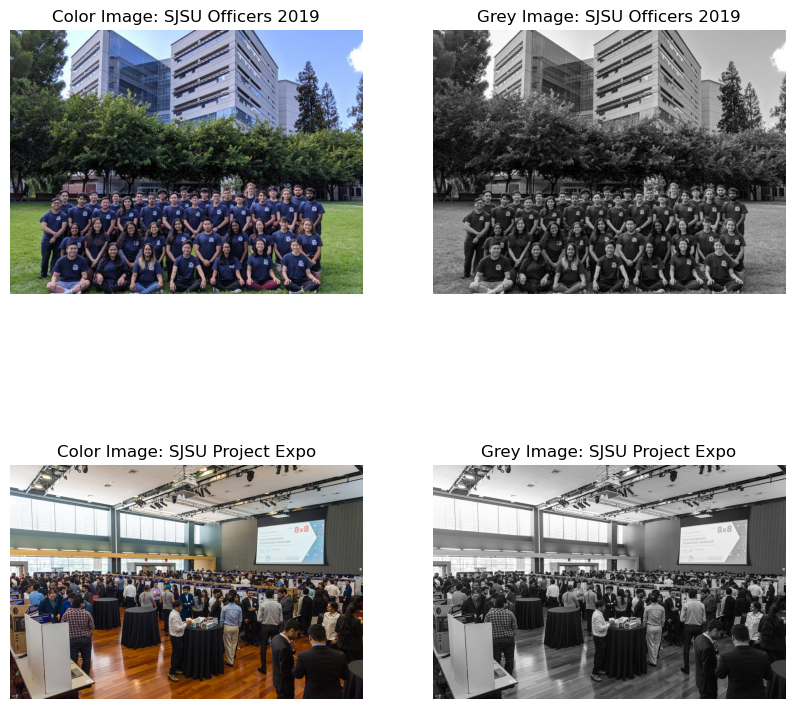

In [ ]:
# Creating a grid of original and greyscaled images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0,0].imshow(image_data['rgb_image_data'][0])
axs[0,0].set_title('Color Image: SJSU Officers 2019')
axs[0,1].imshow(image_data['grey_image_data'][0], cmap='gray')
axs[0,1].set_title('Grey Image: SJSU Officers 2019')
axs[1,0].imshow(image_data['rgb_image_data'][1])
axs[1,0].set_title('Color Image: SJSU Project Expo')
axs[1,1].imshow(image_data['grey_image_data'][1], cmap='gray')
axs[1,1].set_title('Grey Image: SJSU Project Expo')
for ax in axs.ravel():
    ax.axis('off')
plt.show()


## Importing the pre-trained Face Classification Model
Specifically, I will be using the Haar Cascade Model trained on Faces at a Frontal Angle from OpenCV

In [ ]:
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

## Detecting the faces with custom parameters

In [ ]:
detected_faces = []
for img in image_data['grey_image_data']:
    #using a scale factor of 1.01 (smallest scale to detect small faces) &
    #minNeighbors of 8 (to reduce false positives & increase detection accuracy)
    faces = face_detector.detectMultiScale(image=img, scaleFactor=1.01, minNeighbors=8)
    detected_faces.append(faces)

## Visualizing the bounding boxes of the detectable faces given the classifier and custom parameters

I will be using matplotlib as it has a different method of showing the images using jupyter notebook than cv2 (which creates windows pop-ups)

In [ ]:
# the data dictionary is updated with the detected faces
image_data['detected_faces'] = detected_faces
# the dataframe is updated with the detected faces
image_df['detected_faces'] = detected_faces

In [ ]:
image_df

,image_name,bgr_image_data,rgb_image_data,grey_image_data,detected_faces
0,SJSU Officers 2019.jpg,"[[[50, 71, 56], [49, 72, 57], [64, 87, 72], [7...","[[[56, 71, 50], [57, 72, 49], [72, 87, 64], [8...","[[64, 65, 80, 91, 85, 85, 87, 81, 78, 81, 94, ...","[[563, 311, 27, 27], [540, 318, 27, 27], [98, ..."
1,SJSU Project Expo.jpg,"[[[217, 218, 222], [215, 216, 220], [212, 215,...","[[[222, 218, 217], [220, 216, 215], [220, 215,...","[[219, 217, 216, 218, 216, 217, 218, 218, 216,...","[[341, 182, 283, 283], [132, 440, 28, 28], [10..."


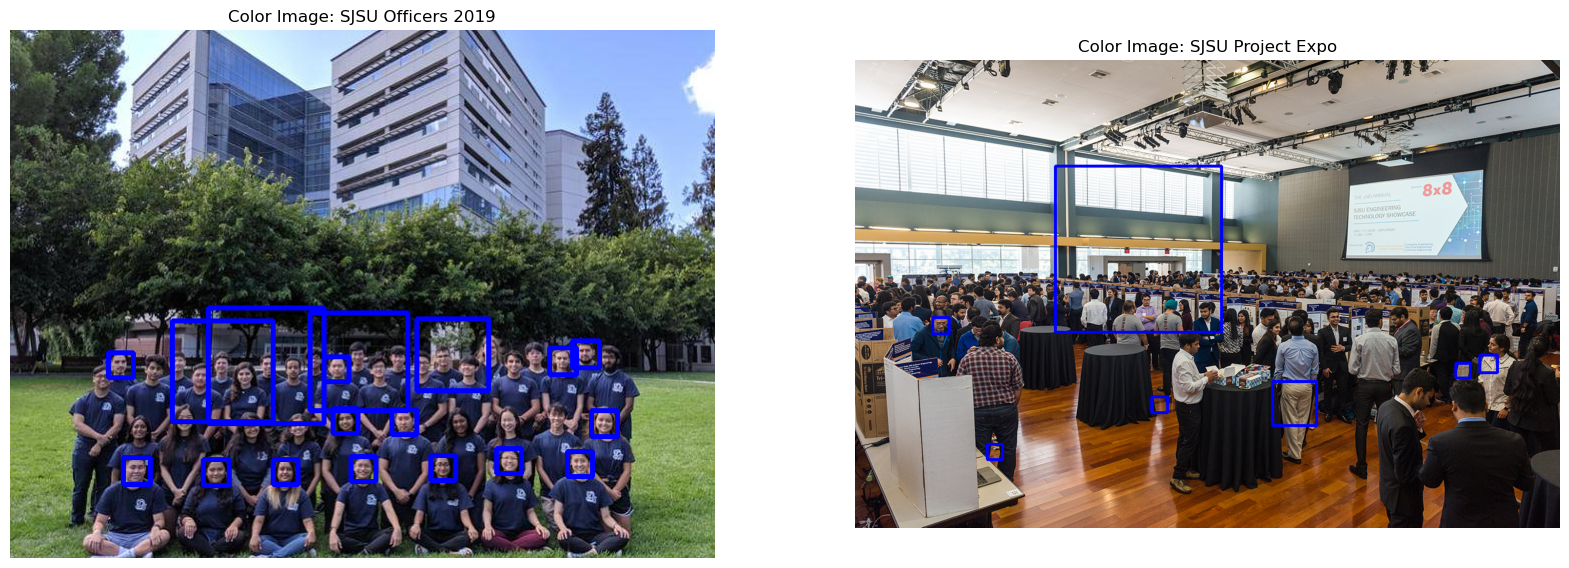

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
axs[0].imshow(image_data['rgb_image_data'][0])
axs[0].set_title('Color Image: SJSU Officers 2019')
for box in image_data['detected_faces'][0]:
    x, y, width, height = box
    x2, y2 = x + width, y + height
    cv2.rectangle(image_data['rgb_image_data'][0], (x, y), (x2, y2), (0,0,255), 3)
axs[1].imshow(image_data['rgb_image_data'][1])
axs[1].set_title('Color Image: SJSU Project Expo')
for box in image_data['detected_faces'][1]:
    x, y, width, height = box
    x2, y2 = x + width, y + height
    cv2.rectangle(image_data['rgb_image_data'][1], (x, y), (x2, y2), (0,0,255), 3)
for ax in axs.ravel():
    ax.axis('off')
plt.show()


# Conclusion
Above, you can see the bounding boxes that were detected for the faces. Given that the left image has the students posing in a orientation that is matching the method which the pre-trained haar cascade model was trained on (images where the people are directly facing the camera), it makes sense that there is cleaner bounding rectangles - and more of them - than the picture of the expo on the right. On the picture to the right, the people are facing in any given direction, and therefore in an expo room full of many more people, there is still maybe only one detected face. I should also take into account the parameters that I used to guide the detection algorithm, where the minNeighbors was set to 8 and the scaleFactor was set to 1.01. These parameters are a little more stringent than the default, and therefore this may have made the model create less bounding boxes on the right, but in the goal of having greater accuracy.